# Iron Condor

주가가 많이 움직일 것 같지 않은 경우의 전략. 제한된 risk 와 제한된 작은 profit 목적.

* 같은 만기일의 4 개의 다른 행사가로 구성

    - Bull put spread
        1. Buy a 240 strike put for 0.8
        2. Sell a 250 strike put for 2.8
    - Bear call spread
        1. Sell a 260 strike call for 2.4
        2. Buy a 270 strike call for 0.8

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def call_payoff(st, strike_price, premium):
    return np.where(st > strike_price, st - strike_price, 0) - premium

In [3]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

In [4]:
# 현물 가격
spot_price = 255

# Long call
strike_price_long_put = 240
premium_long_put = 0.8

# Short call
strike_price_short_put = 250
premium_short_put = 2.8

# Short call
strike_price_short_call = 260
premium_short_call = 2.4

# Long call
strike_price_long_call = 270
premium_long_call = 0.8

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

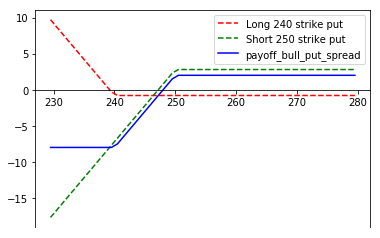

In [16]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = -1 * put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bull_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, 'r--', label='Long 240 strike put')
ax.plot(sT, payoff_short_put, 'g--', label='Short 250 strike put')
ax.plot(sT, payoff_bull_put_spread, 'b-', label='payoff_bull_put_spread')
plt.legend()

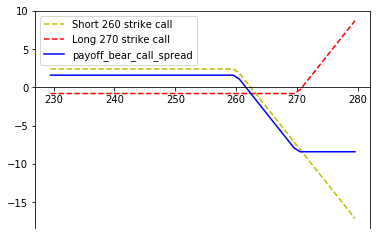

In [22]:
payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_bear_call_spread = payoff_short_call + payoff_long_call

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'y--', label='Short 260 strike call')
ax.plot(sT, payoff_long_call, 'r--', label='Long 270 strike call')
ax.plot(sT, payoff_bear_call_spread, 'b-', label='payoff_bear_call_spread')
plt.legend();

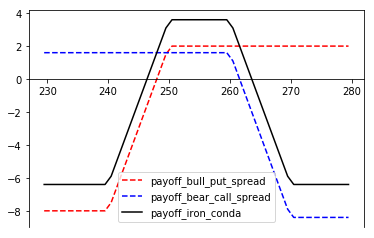

In [26]:
payoff_iron_conda = payoff_bull_put_spread + payoff_bear_call_spread

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_bull_put_spread, 'r--', label='payoff_bull_put_spread')
ax.plot(sT, payoff_bear_call_spread, 'b--', label='payoff_bear_call_spread')
ax.plot(sT, payoff_iron_conda, 'k-', label='payoff_iron_conda')
plt.legend();

최대 이익

1. position 설정시 받은 net credit 으로 한정된다. (2.8 + 2.4 - 0.8 - 0.8 = 3.6)

2. 최대이익은 만기시 주가가 매도한 call 과 put 의 strike price (250, 260) 중간일 때 얻어진다.

최대 손실

1. 이 전략은 주가가 260 이상 혹은 250 이하가 되면 손실을 보기 시작한다.

2. 최대 손실은 주가가 270 이상 혹은 240 이하가 될 때 발생한다.

3. 최대손실 금액 = Spread - Net Premium Received = 10 - 3.6 = 6.4

* 이 전략은 옵션의 내재 변동성이 충분히 커서 선취 프리미엄이 납득할만 해야 하지만, 동시에 strike price 가 충분히 멀어서 in the money 로 가지 않도록 명심해야 한다.